DSP Basics - Prof Ryan Robucci - This notebook introduces some basic code processes required in the field of DSP


A good reference for getting started with numpy and ploting
https://www.labri.fr/perso/nrougier/teaching/matplotlib/

(This is a documentation cell, note I can use latex: $\omega$)


The cell below contains the function zplane which is not commonly included with python packages

To use it your own code you can download the file

- https://bitbucket.org/cfelton/examples/raw/f3383e14f18a57852e17c10ee4cd316fbfafbf85/snippets/zplane/plot_zplane.py

Then use the following import in your pyton code:

- from plot_zplane import zplane


In [55]:
# 017/03/04 changed plot raduis to expand to 10% beyond largest root real/imag component and and manage ticks

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
from scipy import signal


def zplane(b, a, filename=None):
    # """Plot the complex z-plane given a transfer function.
    # """
    # b --> y side coefficient
    # a ---> x side coefficient

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0, 0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coefficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1

    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)

    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
             markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
             markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    # RWR: the following has been modified to fit larger-magnitude roots and manage ticks
    r = 1.1 * \
        max(1.5/1.1, np.abs(np.concatenate((p.real, p.imag, z.real, z.imag))).max())
    plt.axis('scaled')
    if r < 1.6:
        ticks = [-1, -.5, .5, 1]
    elif r < 5:
        ticks = [-2, -1, -.5, .5, 1, 2]
    elif r < 10:
        ticks = [-5, -2, -1, 1, 2, 5]
    elif r < 20:
        ticks = [-10, -1, 1, 10]
    else:
        rlog = np.ceil(np.log10(r))
        ticks = np.arange(-(10**rlog), (10**rlog)+1, 10**(rlog-1)*2)

    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.axis([-r, r, -r, r])

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

    return z, p, k

In [56]:
# Notch filter response on variation of coefficient 

$\mathcal{Z}^{-1}\big\{1+z^-1+z^-2+z^-3\big\}= \delta[n]+ 2\delta[n-1] + 2\delta[n-2] + \delta[n-3]$


In [57]:
import numpy as np
#             z^-2 + 0.618z^-1+1
# H(z)=  --------------------
#          2.618

# a ---> y side coefficient jo ki poles my contribute karta hai
# b --> x side coefficient

b = np.array([1, 0.618, 1])
b = b/sum(b)
a = np.array([1, 0, 0])

In [58]:
from scipy.signal import tf2zpk
from scipy.signal import zpk2tf

[z, p, g] = tf2zpk(b, a)
print('P:', p)
print('Z:', z)
print('G:', g)
[b, a] = zpk2tf(z, p*10, g)
print('b:', b)
print('a:', a)

P: [0. 0.]
Z: [-0.309+0.95106204j -0.309-0.95106204j]
G: 0.38197097020626436
b: [0.38197097 0.23605806 0.38197097]
a: [1. 0. 0.]


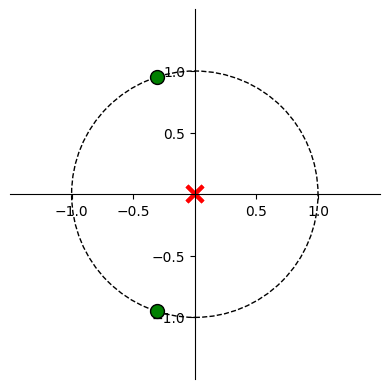

In [59]:
zplane(b, a)
plt.show()

In [60]:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/signal.html
from scipy import signal

In [61]:
w, H = signal.freqz(b, a)
fs = 200
ww = (fs*w)/(2*np.pi)

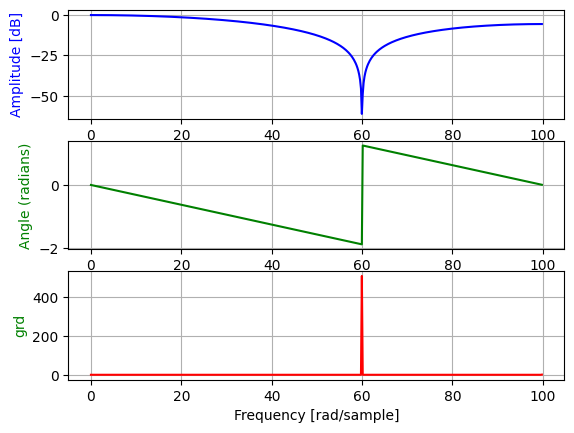

In [62]:
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(ww, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(ww, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp = np.append(grd, 0)
plt.plot(ww, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

In [63]:
ecg = np.genfromtxt('ecg2x60.dat')
print(ecg)

[-3.3520598e-06 -7.8596630e-04 -1.4439532e-02 -6.9322956e-02
 -1.3503911e-01 -1.3201194e-01 -1.1715203e-01 -1.8003200e-01
 -1.9047511e-01 -1.0920432e-01 -1.3844322e-01 -1.9834918e-01
 -1.3094547e-01 -1.1181862e-01 -1.6375960e-01 -1.2906328e-01
 -8.1185970e-02 -1.3302296e-01 -1.4731326e-01 -8.5074928e-02
 -1.2197774e-01 -1.6608456e-01 -9.7208259e-02 -9.6486570e-02
 -1.6828947e-01 -1.1396420e-01 -7.1978703e-02 -1.6063445e-01
 -1.4683853e-01 -4.8945269e-02 -8.3338871e-02 -1.1157957e-01
  1.1666556e-02  5.0128283e-02  1.7387073e-02  8.7600548e-02
  9.9052139e-02  3.3043347e-02  5.5315045e-02  1.1766584e-01
  7.5125593e-02  9.2971492e-04 -6.6405339e-03 -1.6547485e-02
 -3.9243003e-02 -1.7630635e-03  1.4236055e-03 -1.1668930e-01
 -1.5701093e-01 -9.7203203e-02 -1.6522855e-01 -2.2373735e-01
 -1.3686709e-01 -1.3927747e-01 -1.9477036e-01 -1.3843286e-01
 -1.0777381e-01 -1.6704059e-01 -1.5722233e-01 -1.5077618e-01
 -2.5346719e-01 -2.1894349e-01  1.2456257e-01  6.3317673e-01
  1.3865453e+00  2.33804

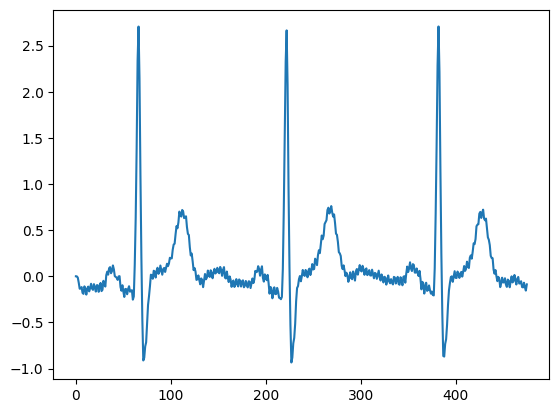

In [64]:
plt.plot(ecg)

Note the "group" or "range" of freqeuncies with a localized, generalized linear delay

What group delay does it correspond to?


In [65]:
filtered_ecg = signal.lfilter(b, a, ecg)

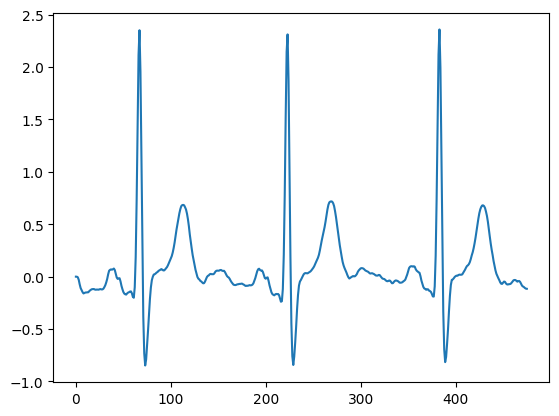

In [66]:
plt.plot(filtered_ecg)

In [67]:
import numpy as np
# https://docs.scipy.org/doc/numpy/reference/routines.fft.html
S = np.fft.fft(ecg)
Y = np.fft.fft(filtered_ecg)

In [68]:
len(omega)

NameError: name 'omega' is not defined

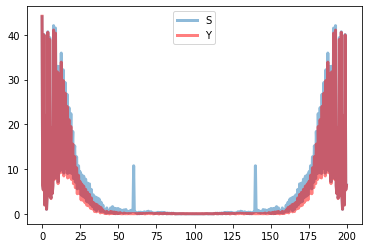

In [ ]:
dF = fs/476
f = np.arange(-fs/2, (fs/2), dF)
# in matlab extra arguments are 'DisplayName','S'
plt.plot(f+fs/2, np.abs(S), label='S', linewidth=3, alpha=.5)
plt.plot(f+fs/2, np.abs(Y), label='Y', linewidth=3, alpha=.5, color='r')
plt.legend()
plt.axis('tight')
plt.show()

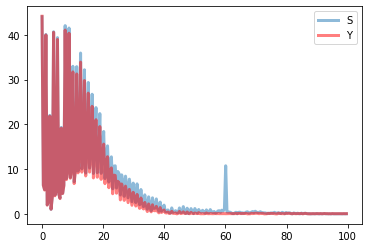

In [ ]:
omega = 2 * np.pi * np.arange(len(S))/len(S)
omega = (omega*fs)/(2 * np.pi)
plt.plot(omega[0:int(476/2)], np.abs(S[0:int(476/2)]), label='S',
         linewidth=3, alpha=.5)  # in matlab extra arguments are 'DisplayName','S'
plt.plot(omega[0:int(476/2)], np.abs(Y[0:int(476/2)]),
         label='Y', linewidth=3, alpha=.5, color='r')
plt.legend()
plt.axis('tight')
plt.show()

In [ ]:
Eecg = np.sum(ecg**2)
Eecg

94.49460053477425

In [ ]:
Efiltecg = np.sum(filtered_ecg**2)
Efiltecg

83.42150042053937

In [ ]:
snr = np.log(Eecg/Efiltecg)

In [ ]:
snr

0.12463662072142397

Next, we rerun the magnitude plot earlier to verify that the gain at the input frequency is a little above $4\times$


We expect a 1.5 sample group delay, based on the center of mass of the impulse response or the derivative of the phase response
